In [19]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [20]:
''' train and test path '''
data_dir_train = pathlib.Path("./Data/Train")
data_dir_test = pathlib.Path('./Data/Test')

In [21]:
''' length of train data '''
train_image_len = len(list(data_dir_train.glob('*/*.jpg')))
print(train_image_len)

''' length of test data '''
test_image_len = len(list(data_dir_test.glob('*/*.jpg')))
print(test_image_len)

1846
101


In [22]:
batch_size = 32
img_height = 180
img_width = 180

In [23]:
''' data augmentation '''
''' using 80-20 split of data, 80% for training and 20% for validation '''
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 1846 files belonging to 9 classes.
Using 1477 files for training.


In [24]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 1846 files belonging to 9 classes.
Using 369 files for validation.


In [25]:

class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


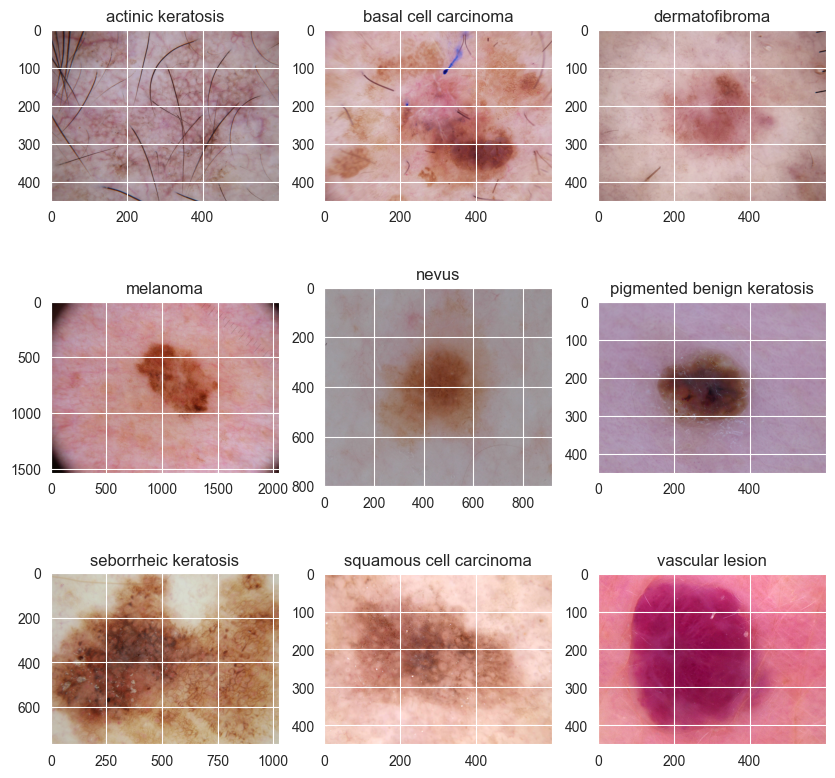

In [26]:
import matplotlib.image as mpimg
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  image = mpimg.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

In [27]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [28]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

In [30]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

#Training

In [32]:
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


D:\collage_documents\Engineering\sem5\CP\venv\lib\site-packages\keras\backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


47/47 [==============================] - 154s 3s/step - loss: 2.0857 - accuracy: 0.2018 - val_loss: 2.0066 - val_accuracy: 0.2304
Epoch 2/30
47/47 [==============================] - 111s 2s/step - loss: 2.0399 - accuracy: 0.2180 - val_loss: 1.9941 - val_accuracy: 0.2222
Epoch 3/30
47/47 [==============================] - 105s 2s/step - loss: 2.0247 - accuracy: 0.2065 - val_loss: 1.9917 - val_accuracy: 0.2060
Epoch 4/30
47/47 [==============================] - 106s 2s/step - loss: 2.0010 - accuracy: 0.2464 - val_loss: 1.9257 - val_accuracy: 0.2331
Epoch 5/30
47/47 [==============================] - 109s 2s/step - loss: 2.0227 - accuracy: 0.2045 - val_loss: 1.9929 - val_accuracy: 0.2222
Epoch 6/30
47/47 [==============================] - 114s 2s/step - loss: 2.0193 - accuracy: 0.2187 - val_loss: 1.9951 - val_accuracy: 0.2222
Epoch 7/30
47/47 [==============================] - 104s 2s/step - loss: 2.0194 - accuracy: 0.2119 - val_loss: 1.9941 - val_accuracy: 0.2222
Epoch 8/30
47/47 [======

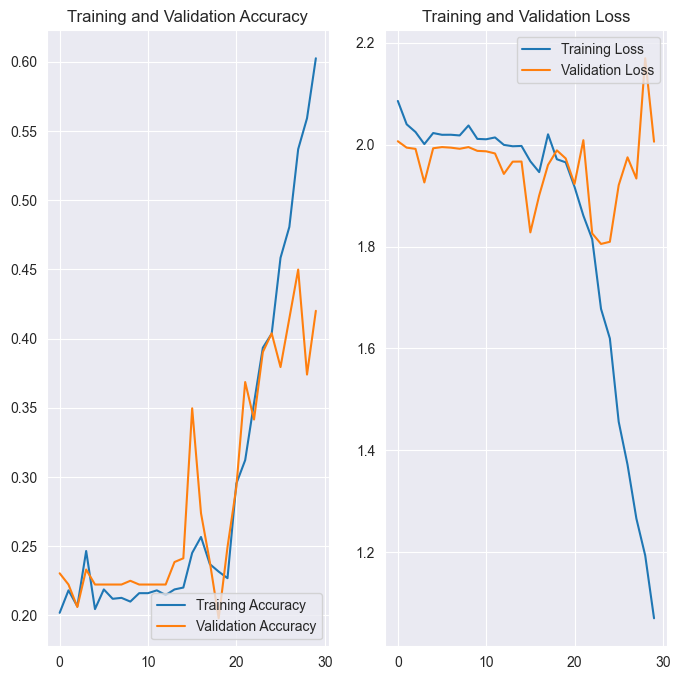

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [34]:

data_aug = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

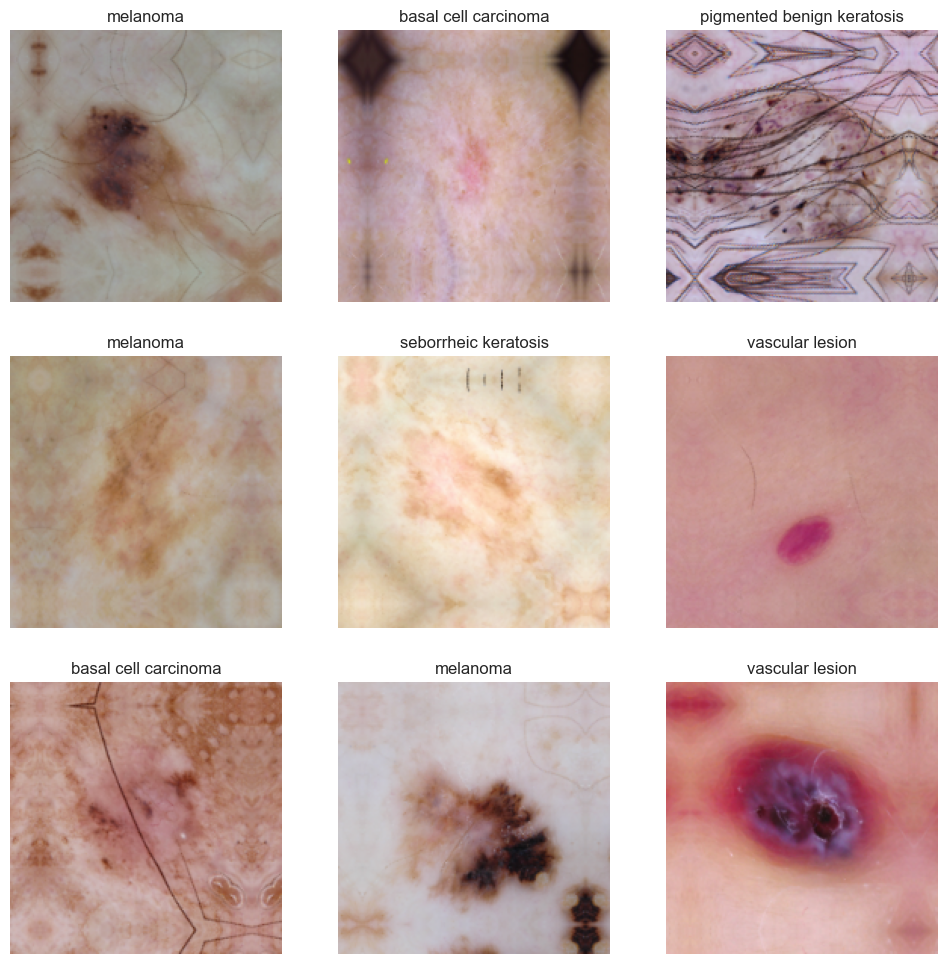

In [35]:
# visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_aug(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [36]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ data_aug,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))

])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))


In [37]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [38]:
## Your code goes here, note: train your model for 100 epochs
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
47/47 [==============================] - 111s 2s/step - loss: 2.0524 - accuracy: 0.2106 - val_loss: 1.9886 - val_accuracy: 0.2222
Epoch 2/30
47/47 [==============================] - 107s 2s/step - loss: 2.0081 - accuracy: 0.2431 - val_loss: 1.9468 - val_accuracy: 0.3767
Epoch 3/30
47/47 [==============================] - 106s 2s/step - loss: 1.8753 - accuracy: 0.3588 - val_loss: 1.6964 - val_accuracy: 0.4634
Epoch 4/30
47/47 [==============================] - 107s 2s/step - loss: 1.6780 - accuracy: 0.4076 - val_loss: 1.6753 - val_accuracy: 0.4607
Epoch 5/30
47/47 [==============================] - 107s 2s/step - loss: 1.6785 - accuracy: 0.4123 - val_loss: 1.6862 - val_accuracy: 0.4363
Epoch 6/30
47/47 [==============================] - 106s 2s/step - loss: 1.5669 - accuracy: 0.4353 - val_loss: 1.6326 - val_accuracy: 0.4553
Epoch 7/30
47/47 [==============================] - 106s 2s/step - loss: 1.5974 - accuracy: 0.4543 - val_loss: 1.5247 - val_accuracy: 0.5095
Epoch 8/30
47

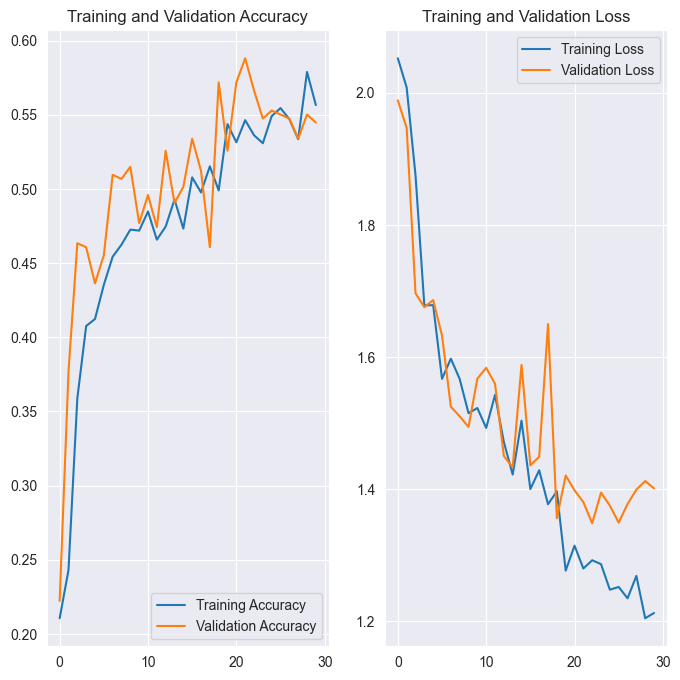

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [40]:
path_list=[]
lesion_list=[]
for i in class_names:

    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,Data\Train\actinic keratosis\ISIC_0025780.jpg,actinic keratosis
1,Data\Train\actinic keratosis\ISIC_0025803.jpg,actinic keratosis
2,Data\Train\actinic keratosis\ISIC_0025825.jpg,actinic keratosis
3,Data\Train\actinic keratosis\ISIC_0025953.jpg,actinic keratosis
4,Data\Train\actinic keratosis\ISIC_0025957.jpg,actinic keratosis
...,...,...
1841,Data\Train\vascular lesion\ISIC_0033844.jpg,vascular lesion
1842,Data\Train\vascular lesion\ISIC_0033969.jpg,vascular lesion
1843,Data\Train\vascular lesion\ISIC_0033991.jpg,vascular lesion
1844,Data\Train\vascular lesion\ISIC_0034196.jpg,vascular lesion


In [41]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,Data\Train\actinic keratosis\ISIC_0025780.jpg,actinic keratosis
1,Data\Train\actinic keratosis\ISIC_0025803.jpg,actinic keratosis
2,Data\Train\actinic keratosis\ISIC_0025825.jpg,actinic keratosis
3,Data\Train\actinic keratosis\ISIC_0025953.jpg,actinic keratosis
4,Data\Train\actinic keratosis\ISIC_0025957.jpg,actinic keratosis
...,...,...
1841,Data\Train\vascular lesion\ISIC_0033844.jpg,vascular lesion
1842,Data\Train\vascular lesion\ISIC_0033969.jpg,vascular lesion
1843,Data\Train\vascular lesion\ISIC_0033991.jpg,vascular lesion
1844,Data\Train\vascular lesion\ISIC_0034196.jpg,vascular lesion


<BarContainer object of 9 artists>

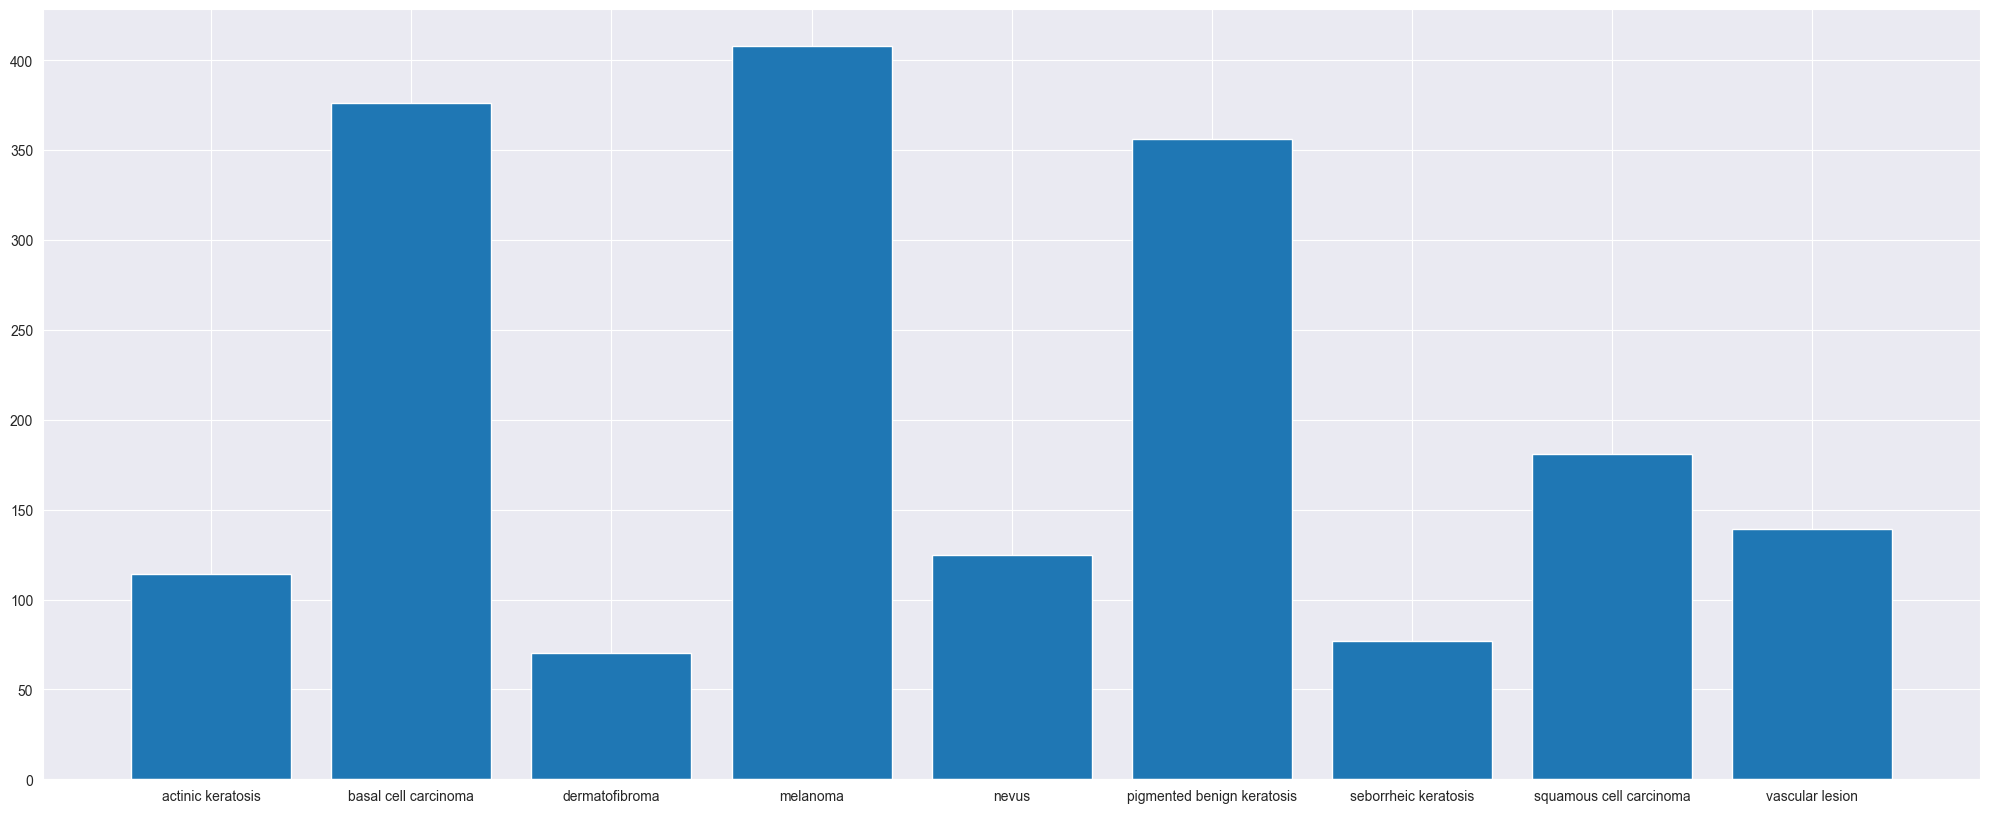

In [42]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

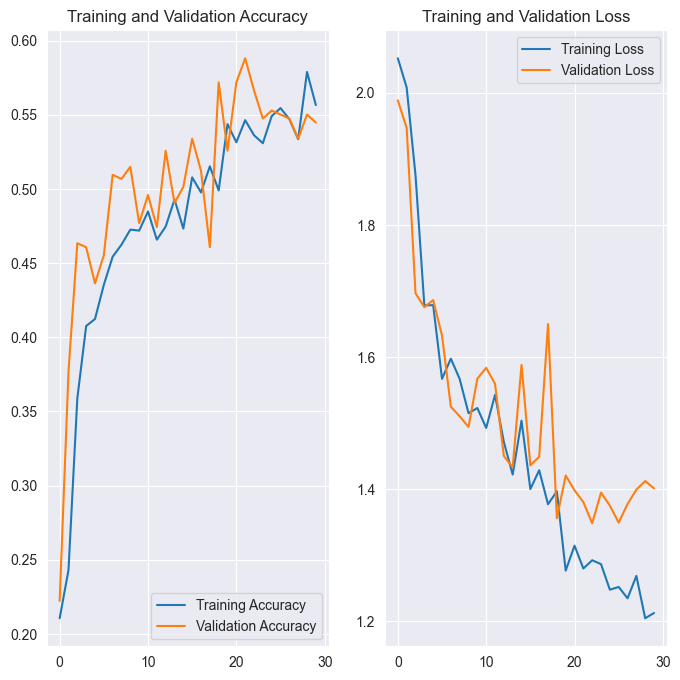

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()